(48, 5)


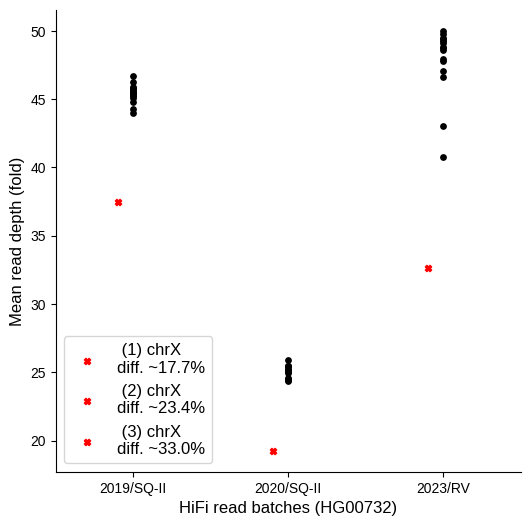

In [17]:
import pathlib
import functools
import statistics
import matplotlib.pyplot as plt
import collections as col

import pandas as pd
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

%cd -q "/home/ebertp/work/code/cubi/project-run-hgsvc-hybrid-assemblies/notebooks"

_PROJECT_CONFIG_NB = str(pathlib.Path("00_project_config.ipynb").resolve(strict=True))
_PLOT_CONFIG_NB = str(pathlib.Path("05_plot_config.ipynb").resolve(strict=True))

%run $_PROJECT_CONFIG_NB
%run $_PLOT_CONFIG_NB

_MYNAME="read-cov-dropouts"
_MYSTAMP=get_nb_stamp(_MYNAME)

_MY_OUT_PATH = PLOT_OUT_SUPPL_FIG.joinpath("cov_dropout")

import matplotlib as mpl
import matplotlib.pyplot as plt
import pathlib as pl

top_folder = PROJECT_DATA_ROOT.joinpath("2024_dropouts")

cov_data = []
for cov_file in top_folder.glob("*cov.txt"):
    if "HG00732" not in cov_file.name:
        continue
    df = pd.read_csv(cov_file, sep="\t", header=0)
    batch = cov_file.name.split(".")[0].split("_")[-2]
    year = cov_file.name.split(".")[0].split("_")[-1]
    sample = cov_file.name.split("_")[0]
    df.rename(columns={"#rname": "chrom"}, inplace=True)
    df = df.loc[df["meandepth"] > 0, :].copy()
    df["batch"] = int(batch.strip("batch"))
    df["year"] = int(year)
    df = df[["chrom", "batch", "year", "coverage", "meandepth"]].copy()
    cov_data.append(df)
    
cov_data = pd.concat(cov_data, axis=0, ignore_index=False)
print(cov_data.shape)
batches = list(range(1,4))

# fig, ax = plt.subplots(figsize=(6,6))
# for batch in batches:
#     select_batch = cov_data["batch"] == batch
#     select_notx = cov_data["chrom"] != "chrX"
#     select_both = select_batch & select_notx
#     batch_data = cov_data.loc[select_both, "coverage"].values
#     ax.scatter(
#         [batch] * batch_data.size,
#         batch_data,
#         color="black",
#         s=15
#     )
    
#     select_x = cov_data["chrom"] == "chrX"
#     select_both = select_batch & select_x
#     value_x = cov_data.loc[select_both, "coverage"]
#     ax.scatter(
#         [batch-0.1],
#         value_x,
#         color="red",
#         marker="X",
#         s=20,
#         label="chrX"
#     )
#     ax.set_ylabel("Reference chromosome coverage (%)", fontsize=12)
#     ax.set_xlabel("HiFi read batches", fontsize=12)
#     ax.set_xticks([1,2,3])
#     ax.set_xticklabels(["2019/SQ", "2020/SQ", "2023/RV"], fontsize=12)
#     ax.set_xlim(0.5, 3.5)
#     ax.legend(loc="best")


fig, ax = plt.subplots(figsize=(6,6))
for batch in batches:
    select_batch = cov_data["batch"] == batch
    select_notx = cov_data["chrom"] != "chrX"
    select_both = select_batch & select_notx
    batch_data = cov_data.loc[select_both, "meandepth"].values
    ax.scatter(
        [batch] * batch_data.size,
        batch_data,
        color="black",
        s=15
    )
    batch_data.sort()
    median = batch_data[batch_data.size//2]
    
    select_x = cov_data["chrom"] == "chrX"
    select_both = select_batch & select_x
    value_x = cov_data.loc[select_both, "meandepth"]
    pct_diff = (round(value_x / median * 100, 2)).iloc[0]
    pct_diff = round(100-pct_diff, 1)
    ax.scatter(
        [batch-0.1],
        value_x,
        color="red",
        marker="X",
        s=20,
        label=f" ({batch}) chrX\ndiff. ~{pct_diff}%"
    )
    ax.set_ylabel("Mean read depth (fold)", fontsize=12)
    ax.set_xlabel("HiFi read batches (HG00732)", fontsize=12)
    ax.set_xticks([1,2,3])
    ax.set_xticklabels(["2019/SQ-II", "2020/SQ-II", "2023/RV"])
    ax.set_xlim(0.5, 3.5)
    ax.tick_params("both", labelsize=10)
    ax.legend(loc="best", fontsize=12)

    if True:
        low_res = _MY_OUT_PATH.joinpath("fig_SXPE_hifi-cov-dropout.lowres.png")
        save_figure(low_res, fig)
        high_res = _MY_OUT_PATH.joinpath("fig_SXPE_hifi-cov-dropout..highres.png")
        save_figure(high_res, fig, dpi=300)
        pdf = _MY_OUT_PATH.joinpath("fig_SXPE_hifi-cov-dropout.pdf")
        save_figure(pdf, fig)